# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Ali Majlesi
2.   Student Number: 401201108


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [2]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test
N = len(dataset.index)
indices = np.arange(N)
np.random.shuffle(indices)

x_train = np.array(dataset.iloc[indices[:int(N*0.8)]].X)
y_train = np.array(dataset.iloc[indices[:int(N*0.8)]].Y).reshape(-1, 1)

x_test = np.array(dataset.iloc[indices[int(N*0.8):]].X)
y_test = np.array(dataset.iloc[indices[int(N*0.8):]].Y).reshape(-1, 1)

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
m0 = (N*x_train@y_train - np.sum(x_train)*np.sum(y_train))/(N*np.sum(x_train**2)-(np.sum(x_train))**2)
m1 = (np.sum(y_train) - m0*np.sum(x_train))/N
m = np.array([m0,m1])

In [4]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(predicted_train_y.reshape(-1,1) , y_train)
test_error = mean_squared_error(predicted_test_y.reshape(-1,1) , y_test)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.37636169725442586
MSE test error: 0.34493935325978464


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

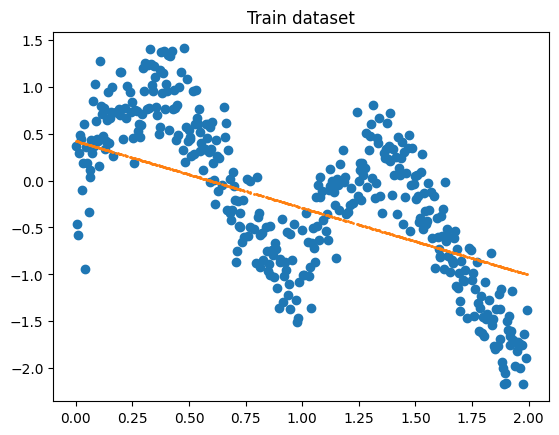

In [5]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

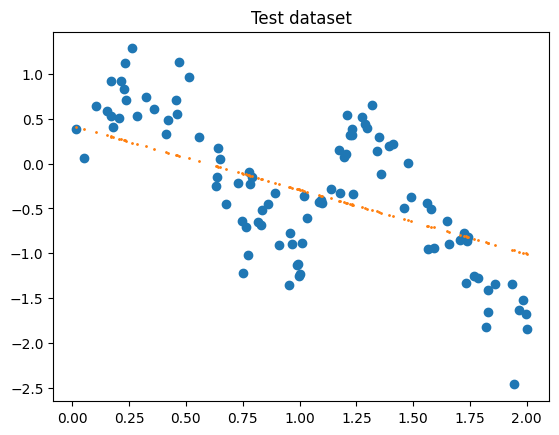

In [6]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

-Were the reported accuracies acceptable?<br>
No, because the numbers are in the range of -2 to 1.5 and MSE is 0.37 which is comparable to the numbers.

-What about the line you drew in the last part?<br>
    The line I drew is the best line fitted to the data, but data points are not placed in a line. But the data is not on a straight line
    
-Was it appropriate for the dataset?<br>
    No, because the data has a variation around the approximated line like sinusoidal variations thus the linear model is not good for this data.

-Explain what are the main problems here.<br>
The model is too simple to accurately represent the data.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes, The piecewise-linear model can provide a more acceptable fit to data. because it is more flexible and can go up and down with the data.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def get_weight_matrix(the_query_point, train_dataset, tau):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(-(xi-the_query_point)@(xi-the_query_point).T/(2*tau**2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [8]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X.reshape(-1,1), np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
#     print('X shape:',X.shape)
#     print('W shape:',W.shape)
#     print('Y shape:',train_Y.shape)
#     print('(X.T@W@X)^-1 : ',np.linalg.inv(X.T@W@X))
#     print('(X.T@W@train_Y) : ', (X.T@W@train_Y))
    theta = np.linalg.inv(X.T@W@X)@(X.T@W@train_Y)

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [9]:
hyperparameter = 0.05
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
predicted_test = np.array([l[0,0] for l in predicted_test]).reshape(-1,1)
error = np.sum((predicted_test - y_test)**2)/len(y_test) 
print(f"MSE test error: {error}")

MSE test error: 0.08901914132171619


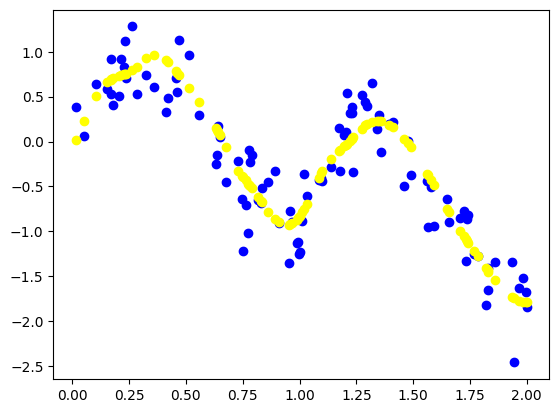

In [10]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes. because this model pays more attention to near points for predicting one point. This is a result of assigning higher weights in near points.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

Yes, It can perform well for this query, but for larger data it can be very resource consuming

### Part10:
Implementing the `KNN model`.

In [11]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.abs(x1-x2) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        distances = [self.distance(x,xi) for xi in self.X]
        
        indices = np.argsort(distances)[:self.k] # find indices of k nearest neighbours to x
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = self.Y[neareest_indices].mean()
#         print('neareest_indices:',neareest_indices)
        return predicted_y

In [12]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = np.array([model.predict(x) for x in x_test]).reshape(-1,1)
    
#     predicted_y = np.array([l[0,0] for l in predicted_y]).reshape(-1,1)
    error = np.sum((predicted_y - y_test)**2)/len(y_test)
    return error, predicted_y

In [13]:
k = 7
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.10447053156261632


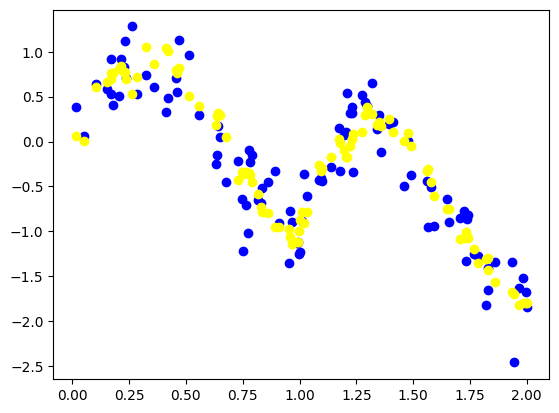

In [14]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

In [15]:
# n_fold = 5
# for k in range(n_fold)
#     fold_size = int(N*0.2)
#     x_train = np.array(dataset.iloc[indices[k*fold_size:(k+1)*fold_size]].X)
#     y_train = np.array(dataset.iloc[indices[:int(N*0.8)]].Y).reshape(-1, 1)

#     x_test = np.array(dataset.iloc[indices[int(N*0.8):]].X)
#     y_test = np.array(dataset.iloc[indices[int(N*0.8):]].Y).reshape(-1, 1)

-write here-